<a href="https://colab.research.google.com/github/NydiaLiu98/Transport_AI_Course/blob/main/01_regression_model_in_transport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bus Delay Prediction**

**Target:**
* **The arrival delay:** The difference between the actual arrival time and the scheduled arrival time of the bus at the stop.

**Inputs(Features):**
* **The dwell time:** The difference between the actual departure time and the actual arrival time of the bus at the consecutive upstream stop.
* **Scheduled travel time:** The difference between scheduled arrival time at the stop and the scheduled departure time at first previous station.
* **UpStream stop delay:** The difference between the actual and scheduled arrival time at the upstream stop.
* **Recurrent delay**


## **Load and prepare the data**

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:03,10033,41355,1,-23,0,39,-4,28.641509
1,01/05/2022 07:21,10033,41356,1,168,0,39,181,27.880597
2,01/05/2022 07:37,10033,44400,1,231,0,39,244,27.852941
3,01/05/2022 07:50,10033,44399,1,150,17,39,143,27.826087
4,01/05/2022 19:29,10033,44060,1,965,35,51,947,42.029412


In [ ]:
df.shape

(2179, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           2179 non-null   object 
 1   Stop_id                2179 non-null   int64  
 2   Bus_id                 2179 non-null   int64  
 3   Line_id                2179 non-null   int64  
 4   Arrival_delay          2179 non-null   int64  
 5   Dwell_time             2179 non-null   int64  
 6   Scheduled_travel_time  2179 non-null   int64  
 7   Upstream_stop_delay    2179 non-null   int64  
 8   Recurrent_delay        2179 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 153.3+ KB


The dataset contains 2179 rows and 9 columns, with no missing values.

For simplicity, we only use 1000 records here.

In [ ]:
df = df.iloc[:1000].copy()

Remove columns that are no longer needed.

In [ ]:
df.columns

Index(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id', 'Arrival_delay',
       'Dwell_time', 'Scheduled_travel_time', 'Upstream_stop_delay',
       'Recurrent_delay'],
      dtype='object')

In [ ]:
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1).copy()

In [ ]:
df

,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,-23,0,39,-4,28.641509
1,168,0,39,181,27.880597
2,231,0,39,244,27.852941
3,150,17,39,143,27.826087
4,965,35,51,947,42.029412
...,...,...,...,...,...
995,174,39,57,153,41.490741
996,99,16,57,95,38.895238
997,91,16,51,80,38.952830
998,105,30,51,92,39.018692


In [ ]:
df.describe()

,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,207.197000,28.309000,59.333000,190.879000,46.307120
std,175.669063,14.508274,6.720363,172.403484,6.513114
min,-72.000000,0.000000,39.000000,-70.000000,27.698630
25%,84.000000,20.000000,57.000000,71.000000,39.390079
50%,168.500000,26.000000,62.000000,154.500000,49.194051
75%,286.250000,34.000000,62.000000,263.250000,51.073590
max,1365.000000,121.000000,103.000000,1364.000000,54.492647


### Visualize  the data

Display the distribution of the arrival delay.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set()

<Axes: title={'center': 'Arrival Delay Distribution'}, xlabel='Arrival_delay', ylabel='Count'>

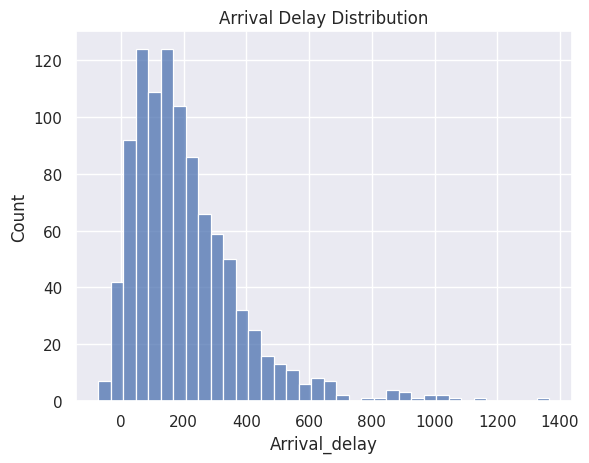

In [ ]:
plt.title('Arrival Delay Distribution')
sns.histplot(data=df, x='Arrival_delay')

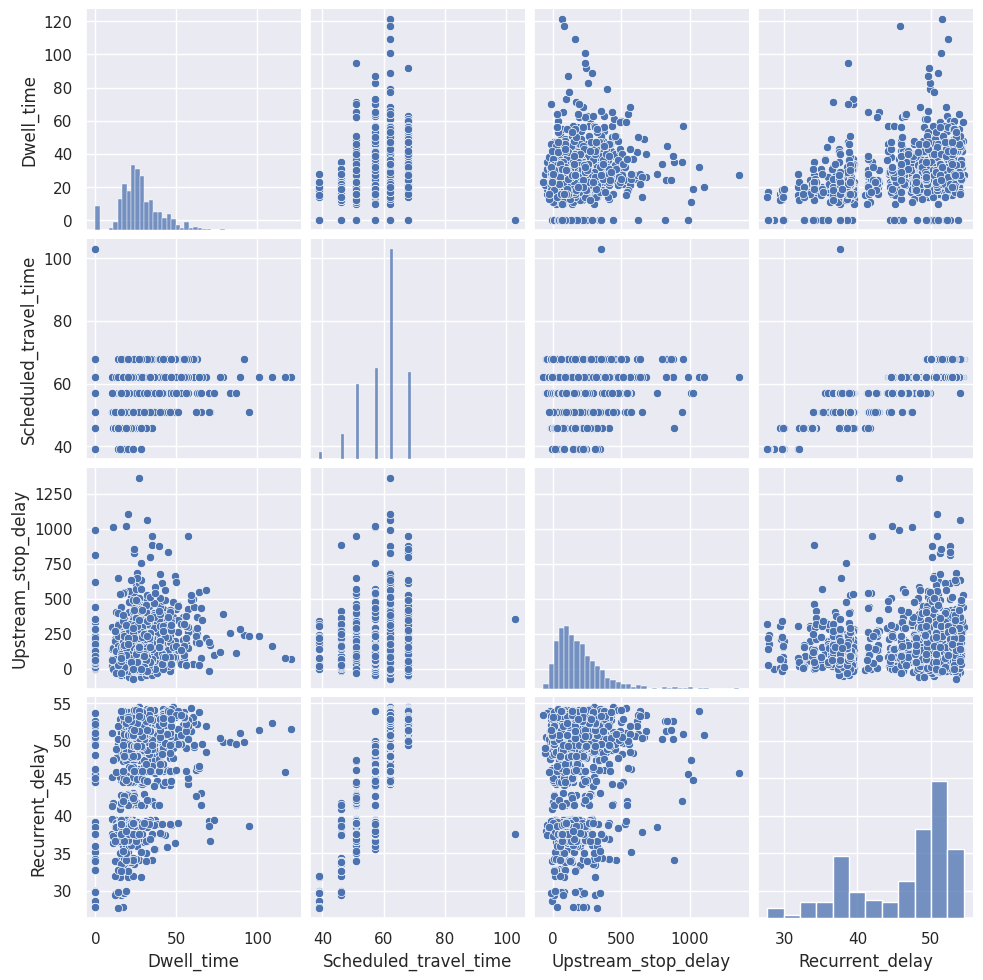

In [ ]:
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

sns.pairplot(x)

Using a correlation matrix to show the pairwise relationships between different attributes.

Text(0.5, 1.0, 'Correlation Matrix')

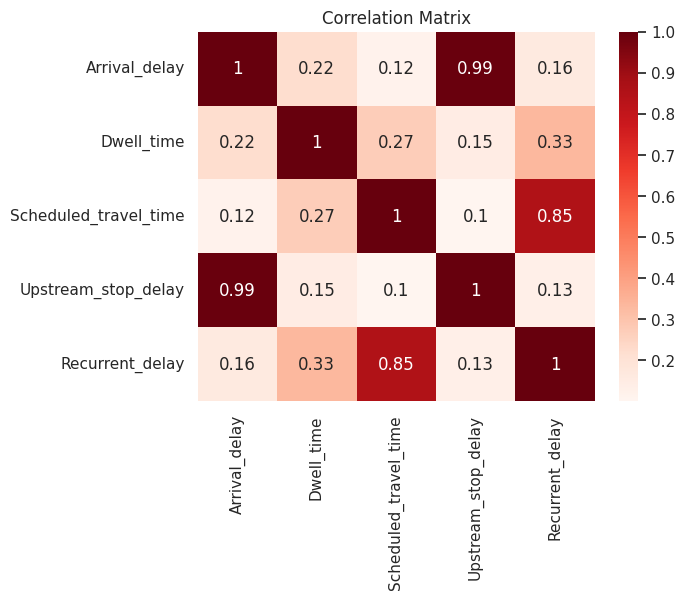

In [ ]:
sns.heatmap(df.corr(),cmap='Reds',annot=True)
plt.title('Correlation Matrix')

## **1. Linear Regression**

### Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Build and Train a Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model_lr = LinearRegression()

# Fit the model to the training data
model_lr.fit(X_train, y_train)

# Predict the test data with the fitted model
y_pred = model_lr.predict(X_test)

### Evaluate the Model

Using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) metrics to evaluate the model's performance.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 9.12762875155385
Mean Squared Error: 164.53315546398673
R-squared: 0.9933828649167205


### Visualize the Results

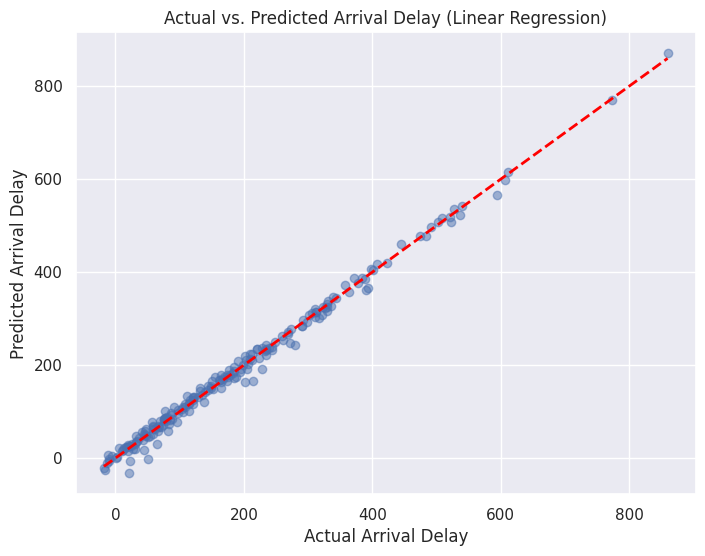

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.5)
# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.title('Actual vs. Predicted Arrival Delay (Linear Regression)')
plt.show()

## **2. SVM**

### Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Feature Scaling

`StandardScaler` and `MinMaxScaler` are commonly used.

**It is important to fit the scaler on the training data only and afterwards apply the fitted scaler to the test data. When fitting the scaler on both the train and test data there might be unwanted information leackage.**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Hyperparameter Tunning

We'll use `GridSearchCV` to search for the best combination of parameters in this case.

The GridSearchCV applies for each parameter set a cross validation (in this case five splits). By executing this cross validation we can increase the robustness of the results.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Create a svr model
model_svr = SVR()

# Define a param_grid to search for
param_grid = {
    'kernel': ['linear','rbf','poly'],
    "C": [0.1, 1, 10],
    "epsilon": [0.1, 1, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2)

# Fit the GridSearchCV object to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and score
best_params = grid_search.best_params_
print("Best parameters: ", best_params)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..................C=0.1, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.1, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.1

### Train a SVM regression model

In [ ]:
best_svr = SVR(kernel=best_params['kernel'], C=best_params['C'],epsilon=best_params['epsilon'])
best_svr.fit(X_train_scaled, y_train)

y_pred = best_svr.predict(X_test_scaled)

### Evaluate the Model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 9.037586184544434
Mean Squared Error: 167.55570797584724
R-squared: 0.9932613049903283


### Visualize the Results

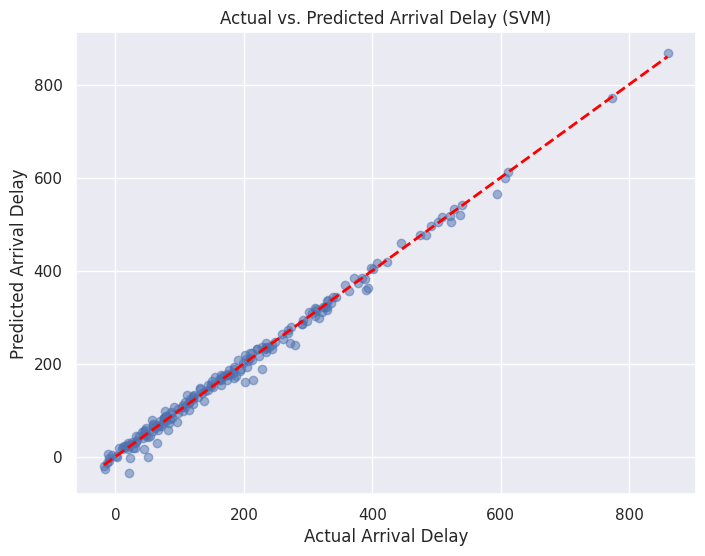

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.5)
# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.title('Actual vs. Predicted Arrival Delay (SVM)')
plt.show()

## **3. XGBoost**

### Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb = XGBRegressor(objective='reg:squarederror',
           random_state=42)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [200,400,600],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb, param_grid, cv=5, verbose=2)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=600; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

### Train a XGBRegression Model

In [ ]:
best_xgb = XGBRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], learning_rate=best_params['learning_rate'])
best_xgb.fit(X_train_scaled, y_train)

y_pred = best_xgb.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 10.342438697814941
Mean Squared Error: 197.56369018554688
R-squared: 0.9920544624328613


### Feature Importance

In [ ]:
best_xgb.feature_importances_

array([0.0115969 , 0.00525313, 0.9811332 , 0.00201674], dtype=float32)

In [ ]:
importance_df = pd.DataFrame({'features': X_train.columns, 'importance': best_xgb.feature_importances_}).sort_values(by='importance', ascending=False)
importance_df

,features,importance
2,Upstream_stop_delay,0.981133
0,Dwell_time,0.011597
1,Scheduled_travel_time,0.005253
3,Recurrent_delay,0.002017


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='features'>

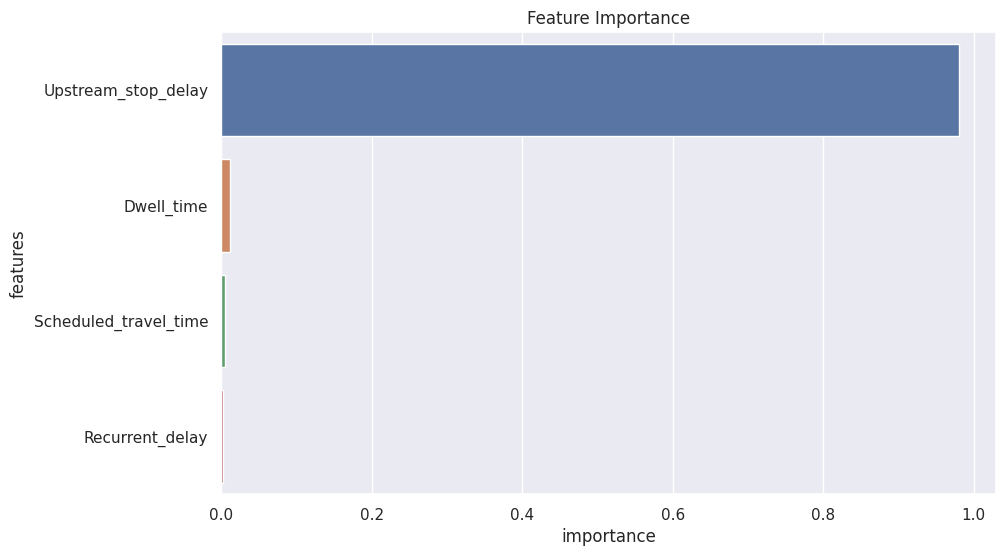

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='features', hue='features')

## **Compare Results**

In [ ]:
import pandas as pd
results = {
    "Model": ["Linear Regression", "SVM", "XGBoost"],
    "MAE": [9.12762875155385, 9.037586184544434, 10.342438697814941],
    "MSE": [164.53315546398673, 167.55570797584724, 197.56369018554688],
    "R2": [0.9933828649167205, 0.9932613049903283, 0.9920544624328613]
}

df_results = pd.DataFrame(results)
print(df_results)

               Model        MAE         MSE        R2
0  Linear Regression   9.127629  164.533155  0.993383
1                SVM   9.037586  167.555708  0.993261
2            XGBoost  10.342439  197.563690  0.992054


# **Demand prediction of bike sharing system**

## **Load Data**

Details at https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BikeSharing.csv'
df = pd.read_csv(url)

# df = pd.read_csv('Exercise2BikeSharing.csv')
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


## **Inputs and Outputs**

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
features = [
    'temp','atemp','hum','windspeed','weathersit',
    'hr','weekday','workingday','holiday','season','yr'
]

target = 'cnt'

In [ ]:
X = df[features].copy()
y = df[target].astype(float).copy()

**Train/Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Let's also identify numerical and categorical columns. Note we treat binary categorical columns(0/1) as numeric columns in this case.

In [ ]:
numeric_cols =['temp','atemp','hum','windspeed','workingday','holiday','yr']

categorical_cols =['weathersit','hr','weekday','season']

### **Scale Numeric Values**

In this case, we scale numeric values to the 0 and 1 range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
scaler.fit(X_train[numeric_cols])

MinMaxScaler()

In [ ]:
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

### **Encode Categorical Columns**

In this case, we one-hot encode categorical columns.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(X_train[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
X_train[encoded_cols] = encoder.transform(X_train[categorical_cols])
X_test[encoded_cols] = encoder.transform(X_test[categorical_cols])

In [ ]:
X_train.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'weathersit', 'hr', 'weekday',
       'workingday', 'holiday', 'season', 'yr', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'season_1',
       'season_2', 'season_3', 'season_4'],
      dtype='object')

Extract out all the useful columns.

In [ ]:
X_train = X_train[numeric_cols + encoded_cols].copy()
X_test = X_test[numeric_cols + encoded_cols].copy()

In [ ]:
X_train

,temp,atemp,hum,windspeed,workingday,holiday,yr,weathersit_1,weathersit_2,weathersit_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,season_1,season_2,season_3,season_4
335,0.183673,0.1970,0.55,0.263195,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7035,0.510204,0.5000,0.42,0.122840,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8051,0.448980,0.4545,1.00,0.263195,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2133,0.448980,0.4545,0.31,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8485,0.183673,0.2273,0.75,0.122840,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.448980,0.4545,0.88,0.105325,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11964,0.653061,0.6212,0.34,0.157870,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5390,0.795918,0.7273,0.43,0.333373,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
860,0.224490,0.1970,0.65,0.491243,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## **SVM**

### Hyperparameter Tunning (Using GridSearchCV)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'kernel': ['linear',  'rbf'],
    'C': [ 1, 10],
    'epsilon': [ 1, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2)

# Fit the grid search to the scaled training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   8.9s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   8.9s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   7.8s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   8.9s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   8.8s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=  12.3s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=  13.9s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=  13.9s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=  13.8s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=  13.8s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   8.0s
[CV] END .....................C=1, epsilon=10, ke

### Train a SVM regression model

In [ ]:
best_svr = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=best_params['epsilon'])
best_svr.fit(X_train, y_train)

SVR(C=10, epsilon=10)

### Make Predictions

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = best_svr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 46.28799467919329
Mean Squared Error: 5636.31745652223
R-squared: 0.8220039715690326


### Visuliza the Results

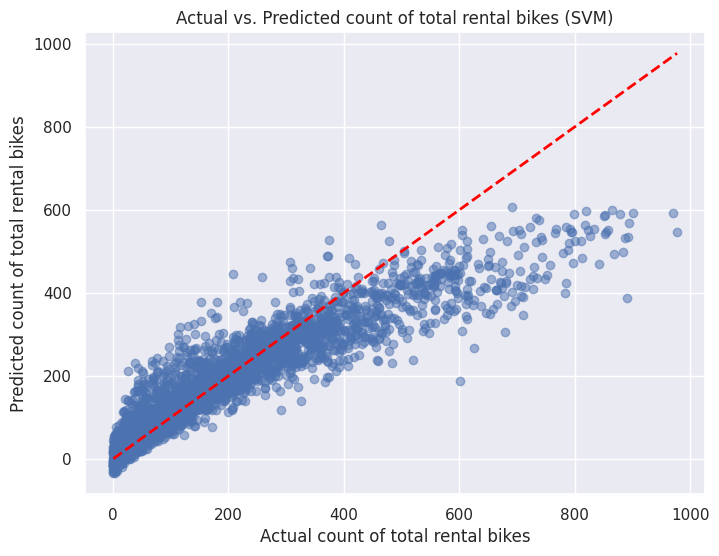

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.5)
# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

plt.xlabel('Actual count of total rental bikes')
plt.ylabel('Predicted count of total rental bikes')
plt.title('Actual vs. Predicted count of total rental bikes (SVM)')
plt.show()

## **XGBoost**

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb = XGBRegressor(objective='reg:squarederror',
           random_state=42)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb, param_grid, cv=5, verbose=2)

# Fit the grid search to the scaled training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.3

In [ ]:
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 28.560966435901314
Mean Squared Error: 1950.5857460165385
R-squared: 0.9384001134458403


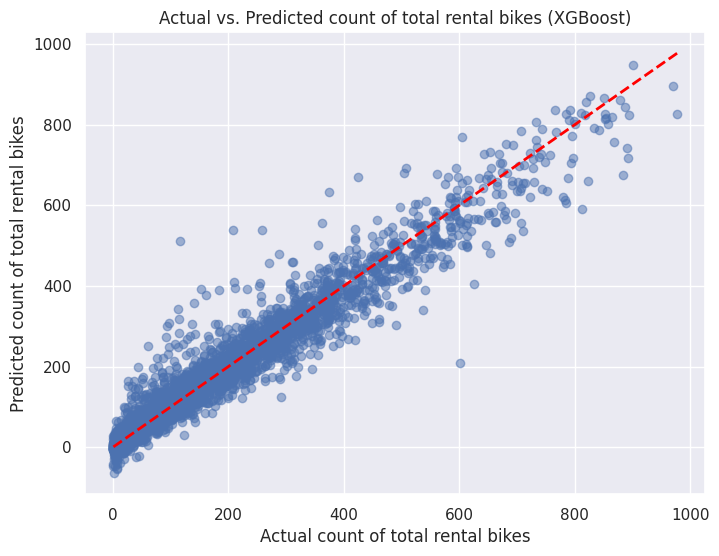

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.5)
# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

plt.xlabel('Actual count of total rental bikes')
plt.ylabel('Predicted count of total rental bikes')
plt.title('Actual vs. Predicted count of total rental bikes (XGBoost)')
plt.show()

### Feature Importance

In [ ]:
best_xgb.feature_importances_

array([0.00870232, 0.01908562, 0.00739972, 0.00107512, 0.02380832,
       0.00192529, 0.01679222, 0.00181151, 0.00122227, 0.00545447,
       0.        , 0.07661019, 0.08660199, 0.07083908, 0.08784222,
       0.08631381, 0.05351816, 0.03220259, 0.01276811, 0.04249785,
       0.00912906, 0.00396034, 0.005811  , 0.0098882 , 0.00768637,
       0.00880357, 0.00385474, 0.02130934, 0.10126476, 0.07514455,
       0.03052075, 0.00421482, 0.00156563, 0.01308686, 0.03447549,
       0.00179998, 0.00148317, 0.00106371, 0.0011883 , 0.0013641 ,
       0.00201009, 0.00241129, 0.00836841, 0.00144982, 0.00138289,
       0.01029181], dtype=float32)

In [ ]:
importance_df = pd.DataFrame({'features': X_train.columns, 'importance': best_xgb.feature_importances_}).sort_values(by='importance', ascending=False)
importance_df.head(10)

,features,importance
28,hr_17,0.101265
14,hr_3,0.087842
12,hr_1,0.086602
15,hr_4,0.086314
11,hr_0,0.076610
29,hr_18,0.075145
13,hr_2,0.070839
16,hr_5,0.053518
19,hr_8,0.042498
34,hr_23,0.034475


In [ ]:
def map_to_original(feature_name):
    if feature_name.startswith("hr_"):
        return "hr"
    elif feature_name.startswith("weekday_"):
        return "weekday"
    elif feature_name.startswith("season_"):
        return "season"
    elif feature_name.startswith("weathersit_"):
        return "weathersit"
    else:
        return feature_name

importance_df["original_feature"] = importance_df["features"].apply(map_to_original)

importance_df

,features,importance,original_feature
28,hr_17,0.101265,hr
14,hr_3,0.087842,hr
12,hr_1,0.086602,hr
15,hr_4,0.086314,hr
11,hr_0,0.076610,hr
29,hr_18,0.075145,hr
13,hr_2,0.070839,hr
16,hr_5,0.053518,hr
19,hr_8,0.042498,hr
34,hr_23,0.034475,hr


In [ ]:
importance_sum_df = importance_df.groupby("original_feature")['importance'].sum().reset_index()
importance_sum_df = importance_sum_df.sort_values(by='importance', ascending=False)

<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='original_feature'>

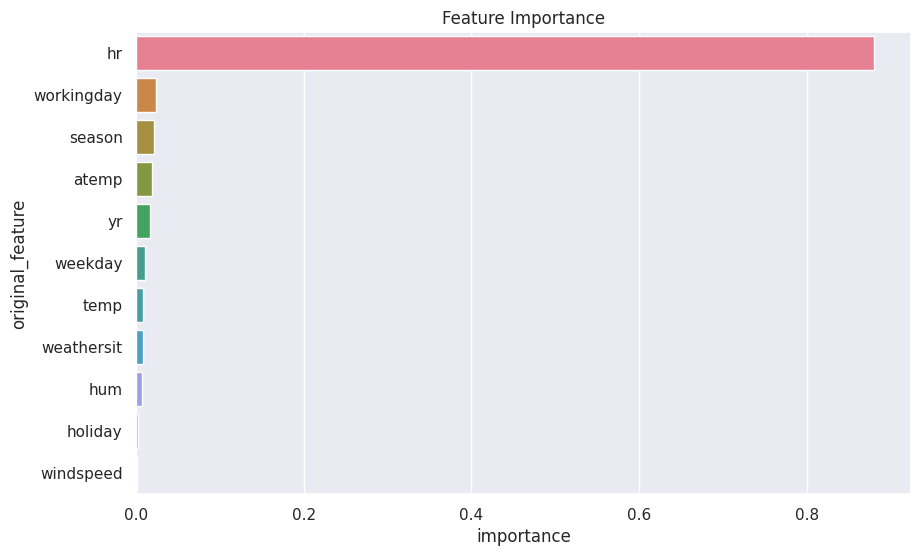

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_sum_df, x='importance', y='original_feature', hue='original_feature')

## **Compare Results**

In [ ]:
import pandas as pd
results = {
    "Model": ["SVM", "XGBoost"],
    "MAE": [46.28799467919329, 28.560966435901314],
    "MSE": [5636.31745652223, 1950.585746016538],
    "R2": [0.8220039715690326, 0.9384001134458403]
}

df_results = pd.DataFrame(results)
print(df_results)

     Model        MAE          MSE        R2
0      SVM  46.287995  5636.317457  0.822004
1  XGBoost  28.560966  1950.585746  0.938400


#

Task 1 - Bus arrival delays prediction:
* Target: The arrival delay;
* Inputs: The dwell time, scheduled travel time, upstream stop delay, recurrent delay.

All variables are numeric and contain no missing values.

Applied three different models, including LinearRegression Model, SVM, and XGBoost, to predict the target.

In each model, the dataset was split into training / testing sets (80%/20%).
For SVR and XGBoost, standard normalization was applied to scale the features. In addition, GridSearchCV was used for hyperparameter tuning in both models.

The optimal parameters for XGBoost included {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}. And the testing performance for XGBoost is MAE: 10.342438697814941, MSE: 197.56369018554688, and R-squared: 0.9920544624328613. However, in this case, the performance of XGBoost was not superior to the other models. The detailed comparison of results is represented in the code as a table.

For this dataset, simpler models can perform just as well as complex ones.

Task 2 - Bike sharing demand prediction:

* features = [
    'temp','atemp','hum','windspeed','weathersit',
    'hr','weekday','workingday','holiday','season','yr'
]
* target = 'cnt'

The dataset was split into training / testing sets (80%/20%).

Feature Enginnering: I treated features as numerical and categorical data. The details are as follows: numeric_cols =['temp','atemp','hum','windspeed','workingday','holiday','yr'], and categorical_cols =['weathersit','hr','weekday','season']. MinMaxScaler was applied to scale numeric value into [0,1] scale. Categorical variables were one-hot encoded.

Two regression models were applied: SVR and XGBoost. GridSearchCV also was used for hyperparameter tuning in both models.

The optimal parameters for XGBoost included {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400, 'subsample': 0.8}. And the testing performance for XGBoost is MAE: 28.560966435901314, MSE: 1950.5857460165385, R-squared: 0.9384001134458403. In this case, the performance of XGBoost was superior to the SVM. The detailed comparison of results is represented in the code as a table.

It's importance to carefully consider feature enginnering.